---
# Convolutional Neural Network (CNN)





---
# Klasifikasi MNIST-Digit

In [0]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 53.9MB/s 
     |████████████████████████████████| 3.8MB 71.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf
tf.__version__ #check version

'2.0.0'

In [0]:
from tensorflow.keras.datasets import mnist   #import dataset
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten  #import layers
from tensorflow.keras.models import Sequential  #iimport model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)



## Load Dataset MNIST-Digit

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape = (60000, 28, 28, 1)
y_train.shape = (60000,)
X_test.shape  = (10000, 28, 28, 1)
y_test.shape  = (10000,)


---
## Visualisasi MNIST-Digit

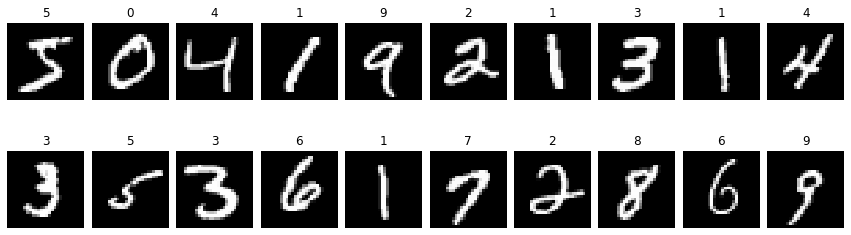

In [0]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10].reshape(28,28), cmap='gray')
        ax[j,i].set_title(y_train[i+j*10])
        ax[j,i].axis('off')
plt.show()

---
## Bagi Data Validasi dan Data Train

In [0]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 28, 28, 1)
y_val.shape   = (10000,)
X_train.shape = (50000, 28, 28, 1)
y_train.shape = (50000,)


---
## One hot matrix

In [0]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel())
y_val_hot = to_categorical(y_val.ravel())
y_test_hot = to_categorical(y_test.ravel())

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (50000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


---
## Buat Model CNN

In [0]:
model = Sequential([
          Conv2D(64, kernel_size=(3,3), strides=(1,1), input_shape=(28,28,1),activation='relu'),
          MaxPooling2D(),
          Flatten(),
          Dense(128,activation='relu'),
          Dense(10,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


---
## Train MNIST Classifier
Mari kita train model kita sebanyak `5 epochs` dengan loss `categorical_crossentropy`

In [0]:
epochs = 5
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_hot,
          validation_data=(X_val, y_val_hot),
          epochs=epochs,
          verbose=2)


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 - 11s - loss: 0.6831 - accuracy: 0.9329 - val_loss: 0.0959 - val_accuracy: 0.9747
Epoch 2/5
50000/50000 - 5s - loss: 0.0796 - accuracy: 0.9765 - val_loss: 0.0874 - val_accuracy: 0.9787
Epoch 3/5
50000/50000 - 5s - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.1183 - val_accuracy: 0.9711
Epoch 4/5
50000/50000 - 5s - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.1019 - val_accuracy: 0.9732
Epoch 5/5
50000/50000 - 5s - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.0939 - val_accuracy: 0.9783


---
## Evaluasi Model

In [0]:
scores = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

---
## Testing Dengan Data Baru


In [0]:
predictions = model.predict(X_test.astype('float32'))

tampilkan hasil prediksi pada 20 gambar

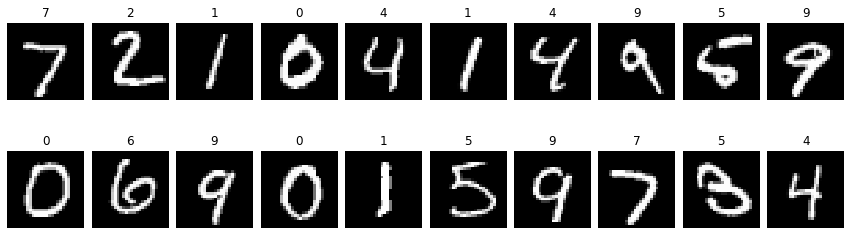

In [0]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_test[i+j*10].reshape(28,28), cmap='gray')
        ax[j,i].set_title(np.argmax(predictions[i+j*10]))
        ax[j,i].axis('off')
plt.show()

---
## Test Dengan Gambar Manual Menggunakan Canvas


In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.jpg', w=300, h=300, line_width=20):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  print('gambar baru diterima')

---
## Input Gambar Baru


In [0]:
draw()

gambar baru diterima


---
## Resize Gambar
Sekarang, ubah data menjadi Grayscale, dan resize data menjadi ukuran yang sama dengan data latih, yaitu `28x28`

ukuran awal =  (300, 300)
ukuran baru =  (28, 28)


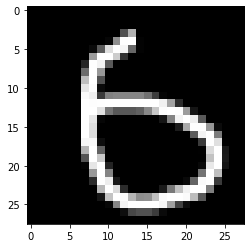

In [0]:
from PIL import Image
import cv2 as cv

new_img = Image.open('drawing.jpg')
new_img = np.array(new_img)[:,:,3]
print('ukuran awal = ',new_img.shape)

new_img2 = cv.resize(new_img, (28, 28),interpolation = cv.INTER_AREA) 
print('ukuran baru = ',new_img2.shape)

plt.imshow(new_img2, cmap='gray')
plt.show()
new_img2 = new_img2.astype('float32')

---
## Prediksi Gambar


In [0]:
y_pred = model.predict(new_img2.reshape((1,28,28,1)))

print("Prediksi data baru: y = " + str(np.argmax(y_pred[0])))

Prediksi data baru: y = 6


---
# Klasifikasi CIFAR-10





---
## Load Dataset CIFAR-10

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


---
## Visualisasi Data CIFAR-10


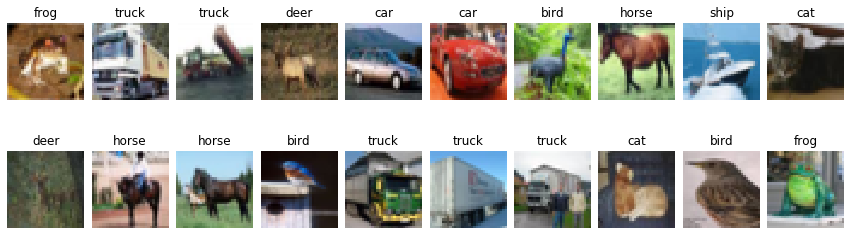

In [0]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10,0]])
        ax[j,i].axis('off')
plt.show()

---
## Bagi Data Validasi
Ambil 10,000 data terakhir dari data latih menjadi data Validasi di dalam matrix `X_val` dan `y_val`

In [0]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 32, 32, 3)
y_val.shape   = (10000, 1)
X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000, 1)


---
## Normalizing Data

In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)


X_train.shape = (40000, 32, 32, 3)
X_val.shape   = (10000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)


---
## One Hot Matrix



 Ubah vektor target `y_train`, `y_val`, dan `y_test` menjadi bentuk One-Hot Matrix

In [0]:
from tensorflow.keras.utils import to_categorical

# jadingan label menjadi one hot matrix dengan menggunakan fungsi to_categorical
y_train_hot = to_categorical(y_train.ravel())
y_val_hot = to_categorical(y_val.ravel())
y_test_hot = to_categorical(y_test.ravel())

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (40000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


---
## Inisialisasi Parameter



In [0]:
num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]
num_epochs = 15
batch_size = 1000

---
## Kita Coba Bandingkan MLP dan CNN
mari kita coba bandingkan MLP dan CNN, jadi mari buat kedua model tersebut

---
## Buat Model MLP

In [0]:
model_ann = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(500, activation = 'relu'),
    Dense(200, activation ='relu'),
    Dense(num_classes, activation = 'softmax')
])

model_ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 1,638,710
Trainable params: 1,638,710
Non-trainable params: 0
_________________________________________________________________


### Latih Model MLP

In [0]:
model_ann.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

hist_ann = model_ann.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs,
          batch_size=batch_size,
          verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 - 1s - loss: 62.3182 - accuracy: 0.2742 - val_loss: 19.2042 - val_accuracy: 0.3133
Epoch 2/15
40000/40000 - 0s - loss: 13.0788 - accuracy: 0.3325 - val_loss: 8.5016 - val_accuracy: 0.2926
Epoch 3/15
40000/40000 - 0s - loss: 4.0912 - accuracy: 0.2441 - val_loss: 2.6619 - val_accuracy: 0.1669
Epoch 4/15
40000/40000 - 0s - loss: 2.2472 - accuracy: 0.1997 - val_loss: 2.4453 - val_accuracy: 0.1768
Epoch 5/15
40000/40000 - 0s - loss: 2.0941 - accuracy: 0.2273 - val_loss: 2.4593 - val_accuracy: 0.1818
Epoch 6/15
40000/40000 - 0s - loss: 2.0051 - accuracy: 0.2615 - val_loss: 2.4531 - val_accuracy: 0.2131
Epoch 7/15
40000/40000 - 0s - loss: 1.9319 - accuracy: 0.2884 - val_loss: 2.4688 - val_accuracy: 0.2253
Epoch 8/15
40000/40000 - 0s - loss: 1.8749 - accuracy: 0.3070 - val_loss: 2.4886 - val_accuracy: 0.2461
Epoch 9/15
40000/40000 - 0s - loss: 1.8162 - accuracy: 0.3288 - val_loss: 2.4876 - val_accuracy: 0.2502
Epoch 10/15

---
## Buat Model CNN


In [0]:
# create model compact sequential

model_cnn = Sequential([
    Conv2D(32, (3,3), input_shape=(32,32,3) ,activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3) ,activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(num_classes, activation ='softmax'),
])

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

---
## Melatih Model

In [0]:
# Compile model
model_cnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000

hist_cnn = model_cnn.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs,
          batch_size=batch_size,
          verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 - 2s - loss: 4.6452 - accuracy: 0.1459 - val_loss: 2.1568 - val_accuracy: 0.2091
Epoch 2/15
40000/40000 - 1s - loss: 2.0238 - accuracy: 0.2680 - val_loss: 1.9168 - val_accuracy: 0.3059
Epoch 3/15
40000/40000 - 1s - loss: 1.8106 - accuracy: 0.3402 - val_loss: 1.7471 - val_accuracy: 0.3595
Epoch 4/15
40000/40000 - 1s - loss: 1.6490 - accuracy: 0.3966 - val_loss: 1.6186 - val_accuracy: 0.4058
Epoch 5/15
40000/40000 - 1s - loss: 1.5380 - accuracy: 0.4401 - val_loss: 1.5657 - val_accuracy: 0.4337
Epoch 6/15
40000/40000 - 1s - loss: 1.4608 - accuracy: 0.4690 - val_loss: 1.4836 - val_accuracy: 0.4622
Epoch 7/15
40000/40000 - 1s - loss: 1.3956 - accuracy: 0.4961 - val_loss: 1.4256 - val_accuracy: 0.4857
Epoch 8/15
40000/40000 - 1s - loss: 1.3396 - accuracy: 0.5197 - val_loss: 1.3820 - val_accuracy: 0.5074
Epoch 9/15
40000/40000 - 1s - loss: 1.2890 - accuracy: 0.5403 - val_loss: 1.3480 - val_accuracy: 0.5213
Epoch 10/15
40

---
## Evaluasi Model


In [0]:
scores_ann = model_ann.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_ann[1]*100))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
scores_cnn = model_cnn.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_cnn[1]*100))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

---
# Perbandingan MLP dan CNN



---
## Jumlah Parameter

In [0]:
print('model MLP:')
model_ann.summary()

print('\n\nmodel CNN:')
model_cnn.summary()

model MLP:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 1,638,710
Trainable params: 1,638,710
Non-trainable params: 0
_________________________________________________________________


model CNN:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896      

In [0]:
print('total parameter MLP:', f'{ model_ann.count_params():,}')
print('total parameter CNN:', f'{ model_cnn.count_params():,}')

total parameter MLP: 1,638,710
total parameter CNN: 73,418


---
## Grafik Hasil Pelatihan

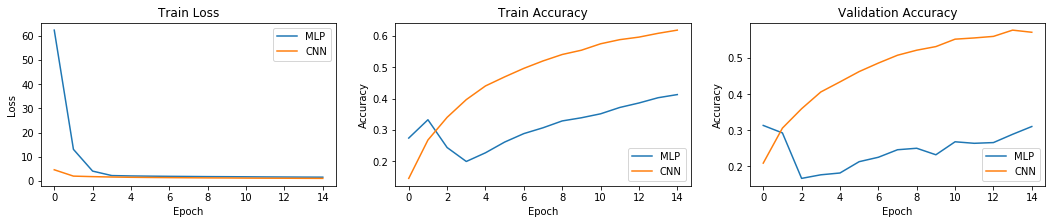

In [0]:
fig, ax = plt.subplots(1,3,figsize=(18,3))

ax[0].plot(hist_ann.history['loss'])
ax[0].plot(hist_cnn.history['loss'])
ax[0].set_title('Train Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['MLP', 'CNN'], loc='upper right')

ax[1].plot(hist_ann.history['accuracy'])
ax[1].plot(hist_cnn.history['accuracy'])
ax[1].set_title('Train Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
# ax[1].set_ylim(bottom=.7)
ax[1].legend(['MLP', 'CNN'], loc='lower right')

ax[2].plot(hist_ann.history['val_accuracy'])
ax[2].plot(hist_cnn.history['val_accuracy'])
ax[2].set_title('Validation Accuracy')
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Epoch')
# ax[2].set_ylim(bottom=.7)
ax[2].legend(['MLP', 'CNN'], loc='lower right')
plt.show()

---
## Akurasi Data Uji

In [0]:
print("Akurasi MLP: %.2f%%" % (scores_ann[1]*100))
print("Akurasi CNN: %.2f%%" % (scores_cnn[1]*100))

Akurasi MLP: 31.61%
Akurasi CNN: 57.03%


---
## Pengecekan Overfitting

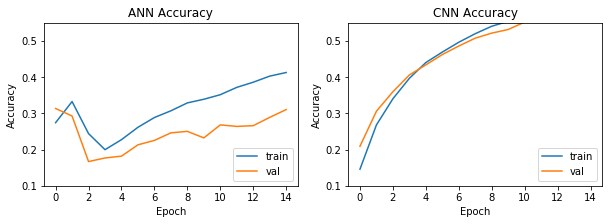

In [0]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(hist_ann.history['accuracy'])
ax[0].plot(hist_ann.history['val_accuracy'])
ax[0].set_title('ANN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(bottom=.1)
ax[0].set_ylim(top=.55)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(hist_cnn.history['accuracy'])
ax[1].plot(hist_cnn.history['val_accuracy'])
ax[1].set_title('CNN Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(bottom=.1)
ax[1].set_ylim(top=.55)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Makin besar gap antara akurasi training dan validasi menandakan makin rentan terhadap overfitting

In [0]:
!wget -O 'test.jpg' 'https://ewscripps.brightspotcdn.com/dims4/default/7cab7a4/2147483647/strip/true/crop/1000x563+0+0/resize/1280x720!/quality/90/?url=https%3A%2F%2Fewscripps.brightspotcdn.com%2Fd1%2F07%2Feadcd0684ba29e1b4ab58c4e9ff8%2Fnot-tippy-cat-000.png'

--2020-03-07 12:16:24--  https://ewscripps.brightspotcdn.com/dims4/default/7cab7a4/2147483647/strip/true/crop/1000x563+0+0/resize/1280x720!/quality/90/?url=https%3A%2F%2Fewscripps.brightspotcdn.com%2Fd1%2F07%2Feadcd0684ba29e1b4ab58c4e9ff8%2Fnot-tippy-cat-000.png
Resolving ewscripps.brightspotcdn.com (ewscripps.brightspotcdn.com)... 99.86.33.90, 99.86.33.105, 99.86.33.47, ...
Connecting to ewscripps.brightspotcdn.com (ewscripps.brightspotcdn.com)|99.86.33.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 916044 (895K) [image/png]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 894.57K  --.-KB/s    in 0.04s   

2020-03-07 12:16:24 (19.7 MB/s) - ‘test.jpg’ saved [916044/916044]



## Load Image

<function matplotlib.pyplot.show>

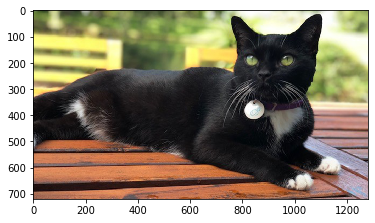

In [0]:
from PIL import Image
import cv2 as cv

new_img = Image.open('test.jpg')
new_img = np.array(new_img)
plt.imshow(new_img)
plt.show

## Resize Image

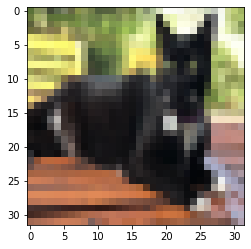

In [0]:
new_img2 = cv.resize(new_img, (32,32), interpolation=cv.INTER_AREA)
plt.imshow(new_img2)
plt.show()

In [0]:
print(new_img2.shape)
new_img2 = np.expand_dims(new_img2,0)
print(new_img2.shape)
new_img2 = new_img2.astype('float32')

(32, 32, 3)
(1, 32, 32, 3)


## View Prediction

In [0]:
pred = model_cnn.predict(new_img2.reshape(1, 32,32,3))
class_id = np.argmax(pred)
print(class_id)
print('kelas prediksi', classes[class_id])

7
kelas prediksi horse


masih ngaur ternyata wkkwk